In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle_dataset'

In [3]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


##IMPORTING KAGGLE DATASET AND UNZIPPING FOLDER AND IMAGES

In [ ]:
#!ls

In [ ]:
#!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
#!kaggle competitions download -c hotel-id-2021-fgvc8

In [ ]:
#!mkdir hotel-id-2021

In [ ]:
#!unzip hotel-id-2021-fgvc8.zip -d hotel-id-2021/

##IMPORTING LIBRARIES

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import os
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization


plt.rcParams["figure.figsize"] = (10,10)

In [5]:
#Reading train csv
train = pd.read_csv("/content/gdrive/MyDrive/kaggle_dataset/hotel-id-2021/train.csv")
train.head()

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22


##BASIC EDA

In [6]:
#Check and confirm the total images in dataset = 97556
print("Number of images in the dataset:",train.shape[0])

Number of images in the dataset: 97556


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97556 entries, 0 to 97555
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      97556 non-null  object
 1   chain      97556 non-null  int64 
 2   hotel_id   97556 non-null  int64 
 3   timestamp  97556 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.0+ MB


In [8]:
#Adding image to dataset [code inpsired by: Arnab Dey]
kaggle_path = "../input/hotel-id-2021-fgvc8/train_images/"
train['full_filepath'] = kaggle_path + train.chain.astype(str) +"/"+ train.image.astype(str)

In [9]:
train.head()

,image,chain,hotel_id,timestamp,full_filepath
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31,../input/hotel-id-2021-fgvc8/train_images/85/8...
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46,../input/hotel-id-2021-fgvc8/train_images/6/80...
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07,../input/hotel-id-2021-fgvc8/train_images/3/80...
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31,../input/hotel-id-2021-fgvc8/train_images/5/80...
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22,../input/hotel-id-2021-fgvc8/train_images/0/80...


In [10]:
#Number of Hotels in dataset
print('Number of Hotel Chains:', train['chain'].nunique())

Number of Hotel Chains: 88


In [11]:
#Number of duplicates
train[train['image'].duplicated(keep=False)]

,image,chain,hotel_id,timestamp,full_filepath
56845,c7c7383898d76598.jpg,6,60918,2020-07-18 00:03:38,../input/hotel-id-2021-fgvc8/train_images/6/c7...
56846,c7c7383898d76598.jpg,6,60918,2020-08-29 04:35:13,../input/hotel-id-2021-fgvc8/train_images/6/c7...
62238,ce27d36c9147cc19.jpg,6,60918,2020-07-18 00:03:38,../input/hotel-id-2021-fgvc8/train_images/6/ce...
62239,ce27d36c9147cc19.jpg,6,60918,2020-08-29 04:35:13,../input/hotel-id-2021-fgvc8/train_images/6/ce...


In [12]:
#Removing duplicates
train = train.drop_duplicates(subset=['image'], keep='first')

In [13]:
print('Number of images: {}' .format(train['image'].unique().size))
print('Number of hotels: {}' .format(train['hotel_id'].unique().size))
print('Number of chains: {}' .format(train['chain'].unique().size))

Number of images: 97554
Number of hotels: 7770
Number of chains: 88


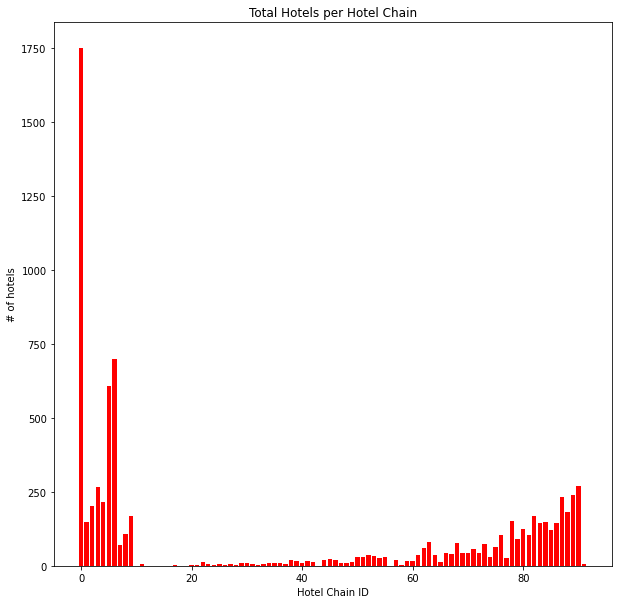

In [14]:
#Hotel Chain Distribution

total_hotels = {}

for hotel_chain_id in train['chain'].unique():
    key = hotel_chain_id
    value = train[train['chain']==hotel_chain_id]['hotel_id'].nunique()
    total_hotels[key] = value

bar = plt.bar(x=total_hotels.keys(), height=total_hotels.values(), color ='red')
plt.xlabel('Hotel Chain ID')
plt.ylabel('# of hotels')
plt.title('Total Hotels per Hotel Chain');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


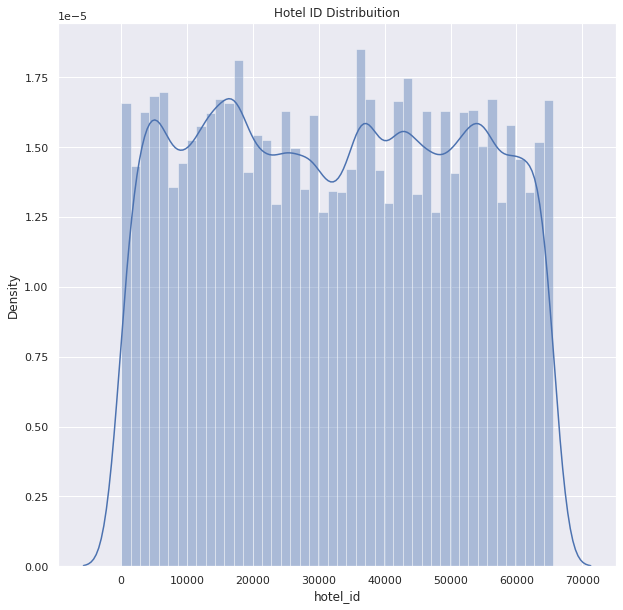

In [15]:
sns.set()
# plt.figure(figsize = (8, 5))
plt.title('Hotel ID Distribuition')
sns.distplot(train['hotel_id']);

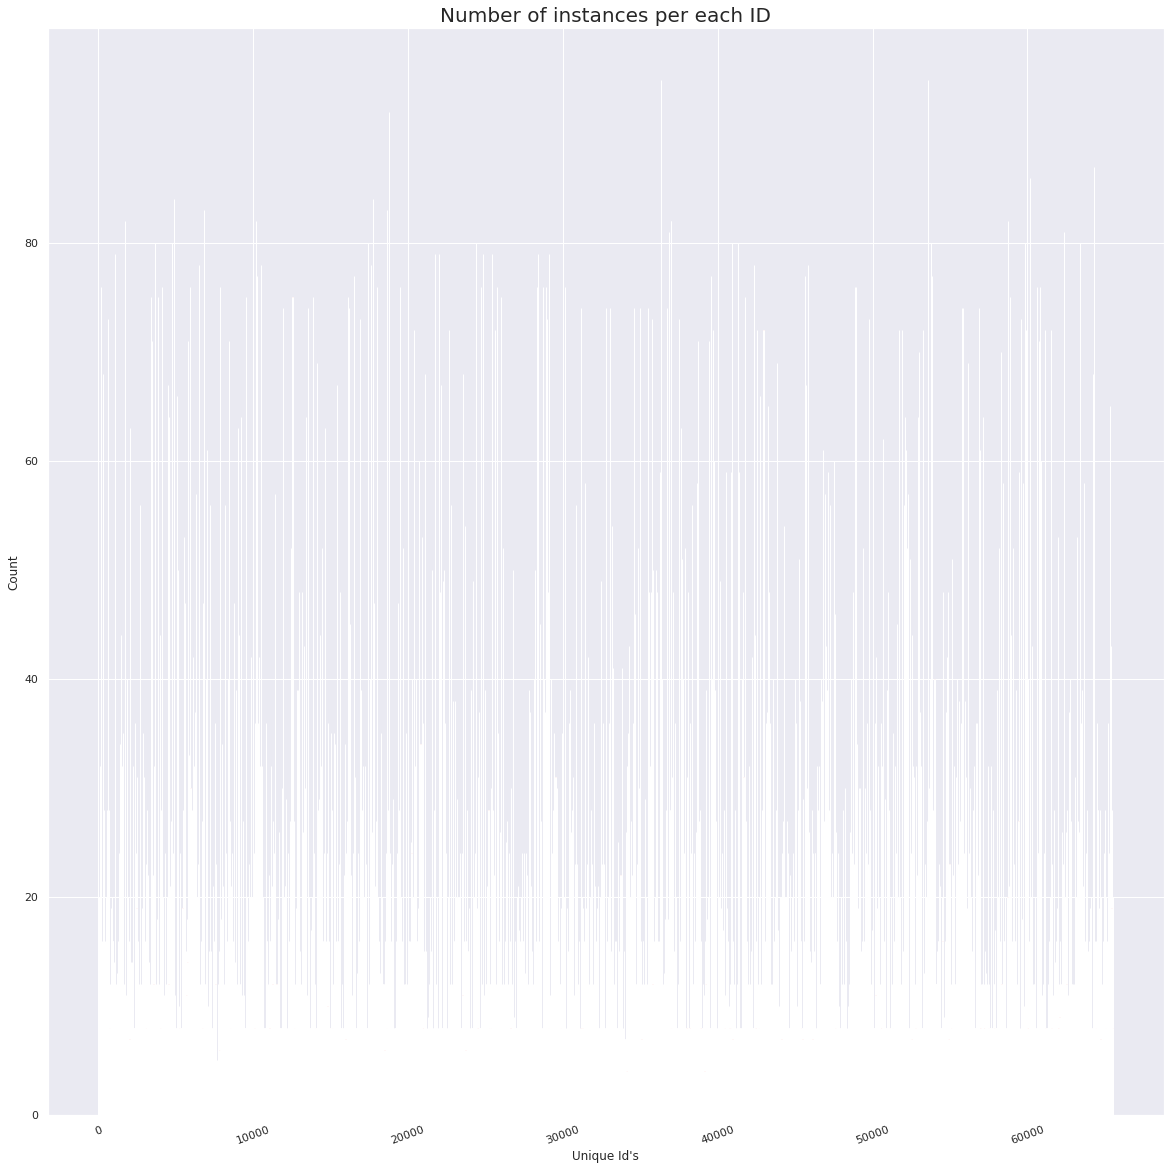

In [16]:
id_dict = train.hotel_id.value_counts()
ids = list(id_dict.index)
ids_count = list(id_dict.values)

plt.figure(figsize = (20,20))

plt.bar(ids,ids_count, color='red')
plt.title("Number of instances per each ID",fontsize=20)
plt.xlabel("Unique Id's") #,fontsize = 15)
plt.xticks(rotation=20)
#plt.xticks(fontweight = "bold")
plt.ylabel("Count") #fontsize=15)
plt.show()

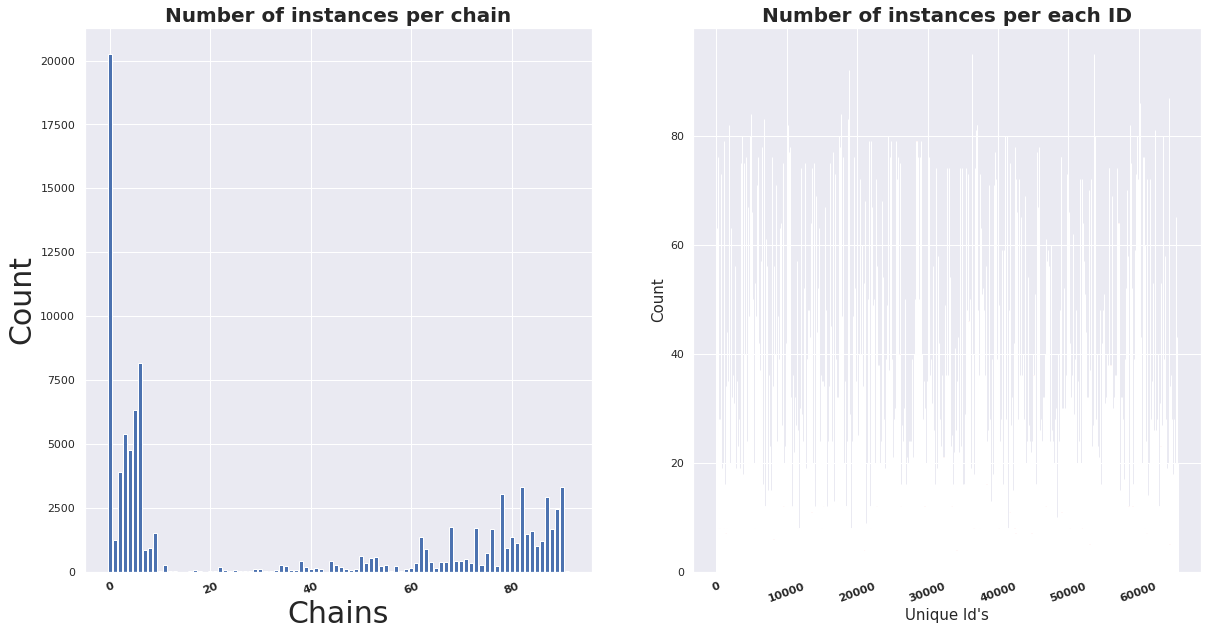

In [17]:
chain_dict = train.chain.value_counts()
chains = list(chain_dict.index)
chains_count = list(chain_dict.values)

id_dict = train.hotel_id.value_counts()
ids = list(id_dict.index)
ids_count = list(id_dict.values)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.bar(chains,chains_count)
plt.title("Number of instances per chain",fontweight="bold",fontsize=20)
plt.xlabel("Chains",fontsize = 30)
plt.xticks(rotation=20,fontweight = "bold")
plt.xticks(fontweight = "bold")
plt.ylabel("Count",fontsize=30)

plt.subplot(1,2,2)
plt.bar(ids,ids_count, color='red')
plt.title("Number of instances per each ID",fontweight="bold",fontsize=20)
plt.xlabel("Unique Id's",fontsize = 15)
plt.xticks(rotation=20,fontweight = "bold")
plt.xticks(fontweight = "bold")
plt.ylabel("Count",fontsize=15)
plt.show()

##Clustering